### Basics of Networkx

In [15]:
import networkx as nx
G = nx.Graph()


#Adding nodes
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(["u","v"])
G.add_nodes_from(range(15))
print("Nodes: ",G.nodes())


#Adding edges
G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,3),{1,4},(1,5),(1,6)])
G.add_edge("u","w")
print("Edges: ",G.edges())


#Removing nodes
G.remove_node(2)
print("Nodes: ",G.nodes())
G.remove_nodes_from([4,5])
print("Nodes: ",G.nodes())


#Removing the edge
G.remove_edge(1,3)
print("Edges: ",G.edges())
G.remove_edges_from([(1,2),("u","v")])


#No. of nodes and edges
print(G.number_of_nodes(),G.number_of_edges())

Nodes:  [1, 2, 3, 'u', 'v', 0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges:  [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')]
Nodes:  [1, 3, 'u', 'v', 0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'w']
Nodes:  [1, 3, 'u', 'v', 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'w']
Edges:  [(1, 6), ('u', 'v'), ('u', 'w')]
15 2


### Graph Visualization

[(1, 1), (3, 0), ('u', 1), ('v', 0), (0, 0), (6, 1), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), ('w', 1)]
1 1


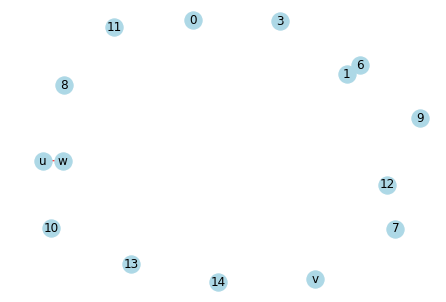

In [16]:
import matplotlib.pyplot as plt
nx.karate_club_graph()
nx.draw(G,with_labels=True, node_color="lightblue", edge_color="red")
print(G.degree())
print(G.degree()["u"], G.degree("u"))

### Random Graphs (ER Graphs)

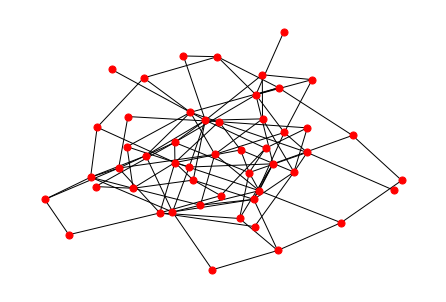

In [18]:
import networkx as nx
from scipy.stats import bernoulli
import matplotlib.pyplot as plt


def er_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1>node2 and bernoulli.rvs(p=p): #We need not add "== True" after "bernoulli.rvs(p=p)"
                G.add_edge(node1,node2)
    #We don't want to draw a edge between nodes (10,1) and (1,10) both
    #That is why, we added node1>node2 condition on the if statement
    #So, we're creating a undirected graphs
    return G
    

N=50
p=0.08
G=er_graph(N,p)

nx.draw(G,node_size=50, node_color="red")

### Inbuilt ER graph

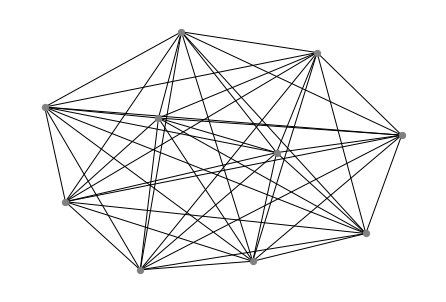

In [59]:
import networkx as nx
nx.draw(nx.erdos_renyi_graph(10,1),node_size=40, node_color="grey")

### Plotting the degree distributions

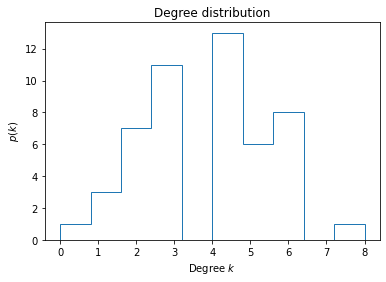

In [6]:
import networkx as nx
from scipy.stats import bernoulli
import matplotlib.pyplot as plt


def er_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1>node2 and bernoulli.rvs(p=p): #We need not add "== True"
                G.add_edge(node1,node2)

    #We don't want to draw a edge between nodes (10,1) and (1,10) both
    #That is why, we added node1>node2 condition on the if statement
    return G
    
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    #G.degree() returns as viewobject
    plt.xlabel("Degree $k$")
    plt.ylabel("$p(k)$")
    plt.title("Degree distribution")
    
    
N , p = 50 , 0.08
G=er_graph(N,p)
plot_degree_distribution(G)


### Tossing a coin

In [41]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.05)

0

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

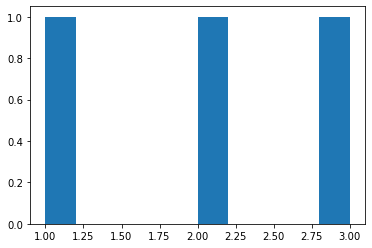

In [8]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

### Descriptive Statistics of Empirical Social Networks

Number of nodes:  843
Number of edges:  3405
Average degree: 8.08
Number of nodes:  877
Number of edges:  3063
Average degree: 6.99


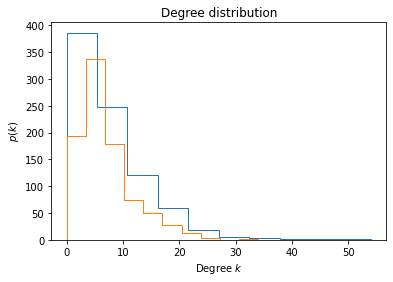

In [20]:
import numpy as np
import networkx as nx

def basic_net_stats(G):
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
    
    
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    #G.degree() returns as viewobject
    plt.xlabel("Degree $k$")
    plt.ylabel("$p(k)$")
    plt.title("Degree distribution")

A1=np.loadtxt("C:/Ajith/Acadamics/edx/Using python for research/week 4/Networks/adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2=np.loadtxt("C:/Ajith/Acadamics/edx/Using python for research/week 4/Networks/adj_allVillageRelationships_vilno_2.csv",delimiter=",")

G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)
basic_net_stats(G1)
basic_net_stats(G2)
plot_degree_distribution(G1)
plot_degree_distribution(G2)

### Finding the Largest Connected Component

In [21]:

G1_LCC = max([G1.subgraph(c).copy() for c in nx.connected_components(G1)],key=len)
#G1_LCC is largest connected component of the graph G1
print(len(G1_LCC)) #(or) G1.number_of_nodes(). 
#Above line gives the number of nodes in the largest component

G2_LCC = max([G2.subgraph(c).copy() for c in nx.connected_components(G2)],key=len)
print(len(G2_LCC))

825
810


In [22]:
for c in nx.connected_components(G1):
    print(c)
    #print the all the components of the graph along with its nodes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,